In [1]:
from pathlib import Path

# Get the current working directory as a Path object
current_path = Path.cwd()
home_folder = 'evan_home'

# Traverse up the directory tree until you find the target folder
for parent in [current_path] + list(current_path.parents):
    if parent.name == home_folder:
        home_path = parent
        break
else:
    raise ValueError(f"Folder '{home_folder}' not found in the current working directory.")

print("Home Path:", home_path)
source_code_dir = home_path / 'Source_code'
dataset_dir = home_path / 'Dataset'


Home Path: c:\Users\evanlee\Documents\Bmi_NAS_evan\evan_home


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import os
import scanpy as sc

In [3]:
# adata = sc.read_h5ad(r"C:\Users\evanlee\Documents\Research_datasets\PBMC_Hao\GSE164378_Hao\Harmony_noZ\Hao_Harmony_test_no_scale.h5ad")
# adata = sc.read_h5ad('/Users/evanli/Documents/Research_datasets/PBMC_Hao/GSE164378_Hao/Harmony_noZ/Hao_Harmony_test_no_scale.h5ad')
adata = sc.read_h5ad(dataset_dir / 'PBMC_Hao/GSE164378_Hao/Harmony_noZ/Hao_Harmony_test_no_scale.h5ad')
print('Original adata:', adata.shape)
adata.obs['celltype.l2'] = adata.obs['celltype.l2'].str.replace(' ', '_')
label = adata.obs['celltype.l2'].tolist()
types = np.unique(label).tolist()
adata.obs.head()

Original adata: (161764, 33538)


,celltype.l1,celltype.l2,celltype.l3,Batch,donor,time,lane,Phase,nCount_ADT,nFeature_ADT,nCount_RNA,nFeature_RNA,leiden
L1_AAACCCAAGAAACTCA,Mono,CD14_Mono,CD14 Mono,Batch1,P2,7,L1,G1,7535,217,10823,2915,4
L1_AAACCCAAGACATACA,CD4 T,CD4_TCM,CD4 TCM_1,Batch1,P1,7,L1,G1,6013,209,5864,1617,2
L1_AAACCCACAACTGGTT,CD8 T,CD8_Naive,CD8 Naive,Batch1,P4,2,L1,S,6620,213,5067,1381,5
L1_AAACCCACACGTACTA,NK,NK,NK_2,Batch1,P3,7,L1,G1,3567,202,4786,1890,3
L1_AAACCCACAGCATACT,CD8 T,CD8_Naive,CD8 Naive,Batch1,P4,7,L1,G1,6402,215,6505,1621,5


Text(0, 0.5, 'Counts')

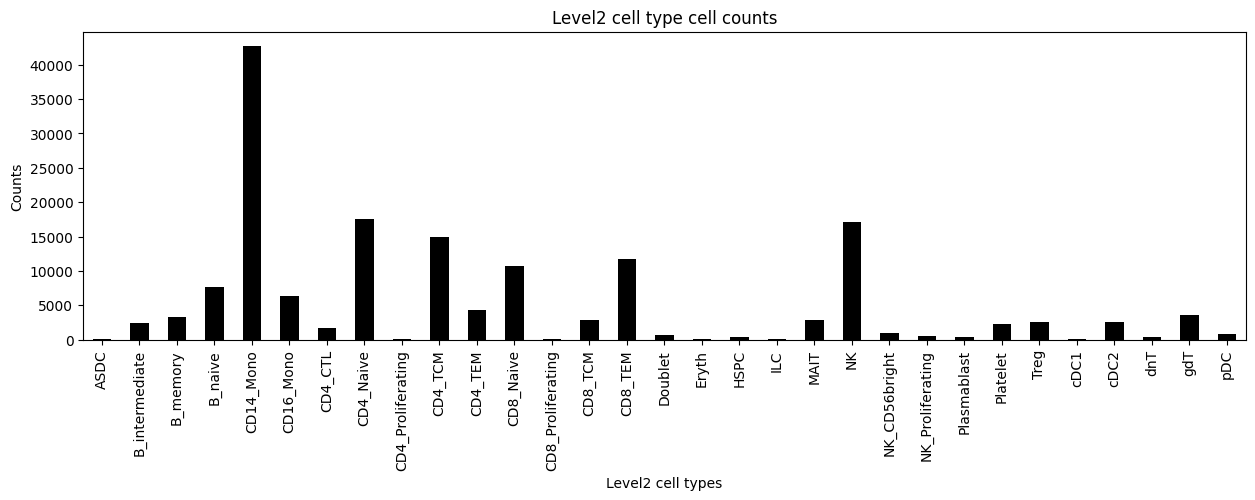

In [4]:
# Plot Level 1 cell counts
# cell number
adata.obs['celltype.l2'].value_counts().loc[types].plot.bar(rot=90, figsize=(15, 4), title='Level2 cell type cell counts', color='black')
plt.xlabel('Level2 cell types')
plt.ylabel('Counts')

## Read metrics

In [5]:
# lr_metrics_l2 = pd.read_csv('/Users/evanli/Documents/EvanPys/Progress/PBMC_Hao_batch_noZ/Level2/LR_likelihood/LR_metrics_l2_k3_stratifiedKF.csv', index_col=0)
# svm_rbf_metrics_l2 = pd.read_csv('/Users/evanli/Documents/EvanPys/Progress/PBMC_Hao_batch_noZ/Level2/SVM_model/rbf/SVM_metrics_rbf_StandardScale_l2.csv', index_col=0)
# svm_linear_metrics_l2 = pd.read_csv('/Users/evanli/Documents/EvanPys/Progress/PBMC_Hao_batch_noZ/Level2/SVM_model/linear/SVM_metrics_linear_StandardScale_l2.csv', index_col=0)
# xgb_metrics_l2 = pd.read_csv('/Users/evanli/Documents/EvanPys/Progress/PBMC_Hao_batch_noZ/Level2/XGB_model/XGBclassifier_binary_metrics_l2.csv', index_col=0)

In [6]:
lr_metrics_l2 = pd.read_csv(source_code_dir / 'PBMC_Hao_batch_noZ/Level2/LR_likelihood/LR_metrics_l2_k3_stratifiedKF.csv', index_col=0)
svm_rbf_metrics_l2 = pd.read_csv(source_code_dir / 'PBMC_Hao_batch_noZ/Level2/SVM_model/rbf/SVM_metrics_rbf_StandardScale_l2.csv', index_col=0)
svm_linear_metrics_l2 = pd.read_csv(source_code_dir / 'PBMC_Hao_batch_noZ/Level2/SVM_model/linear/SVM_metrics_linear_StandardScale_l2.csv', index_col=0)
xgb_metrics_l2 = pd.read_csv(source_code_dir / 'PBMC_Hao_batch_noZ/Level2/XGB_model/XGBclassifier_binary_metrics_l2.csv', index_col=0)

In [7]:
lr_metrics_l2.head()

,Accuracy,Precision,Recall,F1-score,ROC-AUC,PR-AUC,MCC
ASDC,0.999923,0.971429,0.870513,0.913469,0.999972,0.967212,0.917174
B_intermediate,0.994861,0.853788,0.794859,0.822998,0.997552,0.899789,0.821074
B_memory,0.997574,0.943085,0.937223,0.940049,0.999399,0.985040,0.938865
B_naive,0.995518,0.952893,0.953189,0.953032,0.999371,0.986180,0.950684
CD14_Mono,0.990828,0.977971,0.987497,0.982708,0.998837,0.994664,0.976490


In [8]:
lr_metrics_l2.columns

Index(['Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC-AUC', 'PR-AUC',
       'MCC'],
      dtype='object')

## Dotplot

In [9]:
def plot_metric_from_diff_models(model_diff_metrics_list, metric_to_plot='Accuracy', legend=True):
    models = ['Logistic Regression', 'SVM-RBF', 'SVM-Linear', 'XGBoost']
    metric_df = pd.DataFrame()
    for i, df in enumerate(model_diff_metrics_list):
        metric = df[metric_to_plot]  # accuracy, precision and so on
        metric_df[models[i]] = metric
    
    plt.figure(figsize=(15, 5))
    x = np.arange(len(metric_df))
    width = 0.2
    for i in range(0, len(metric_df), 2):
        plt.axvspan(i-0.5, i+0.5, color='gray', alpha=0.1)
    for i, model in enumerate(models):
        i -= 1.5
        plt.scatter(x + i * width, metric_df[model], label=model, s=20)  # 's' controls dot size

    # Formatting
    plt.xticks(x, metric_df.index, rotation=90)
    plt.title(f'{metric_to_plot} of Different Models')
    plt.ylabel(f'{metric_to_plot}')
    plt.ylim(0, 1.05)
    plt.xlim(-0.5, len(metric_df) - 0.5)
    if legend:
        plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    plt.tight_layout()
    plt.show()

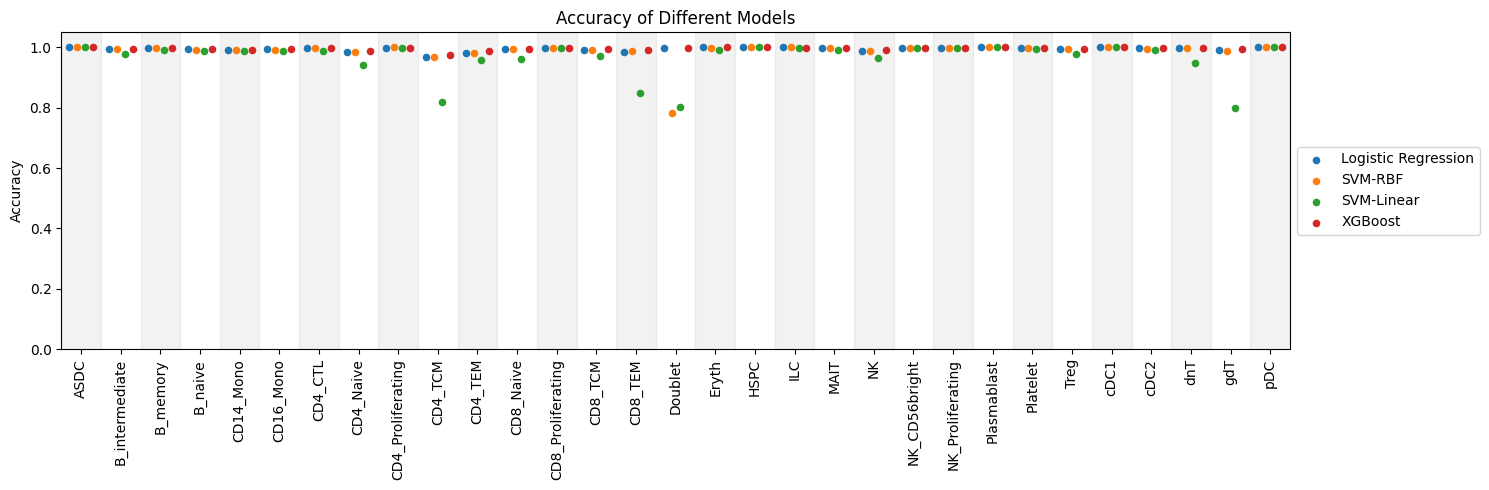

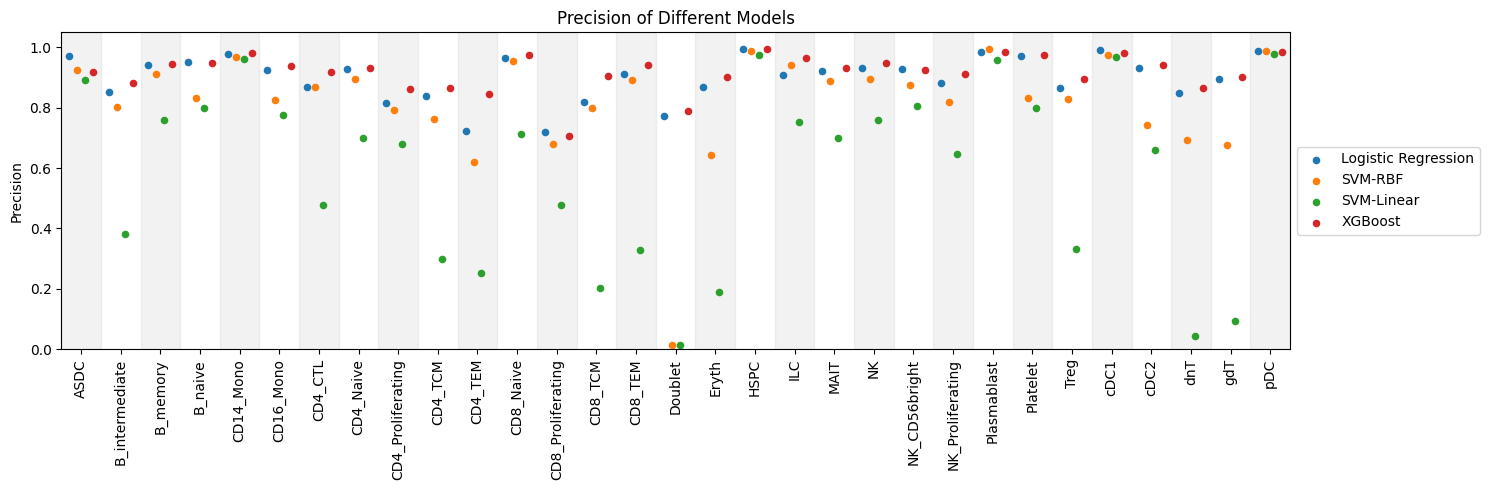

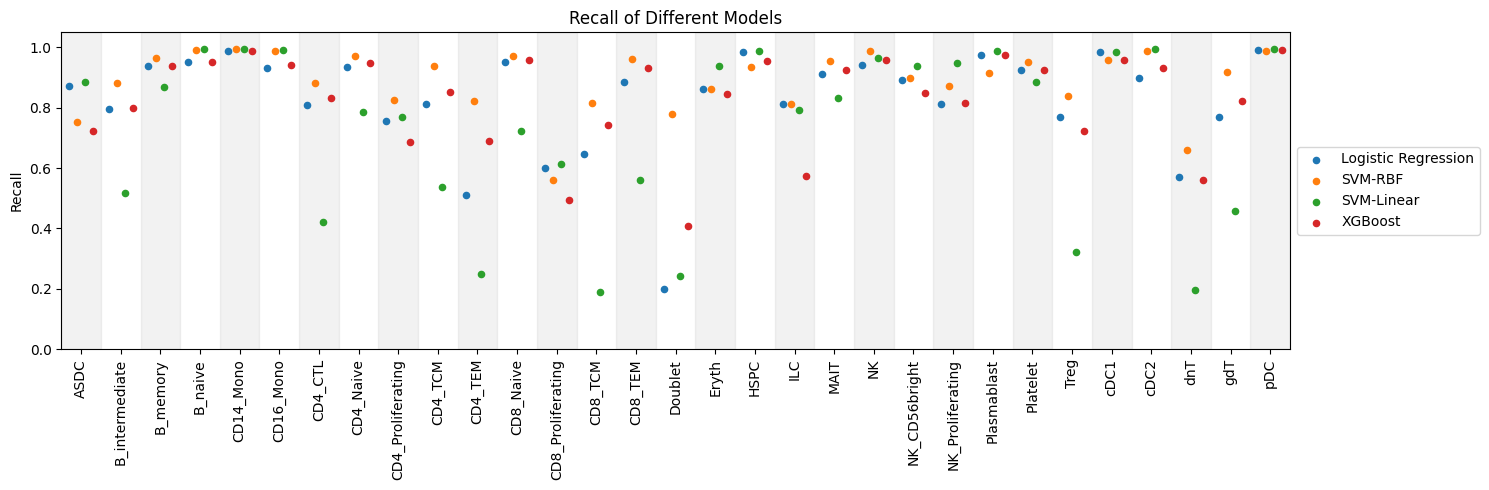

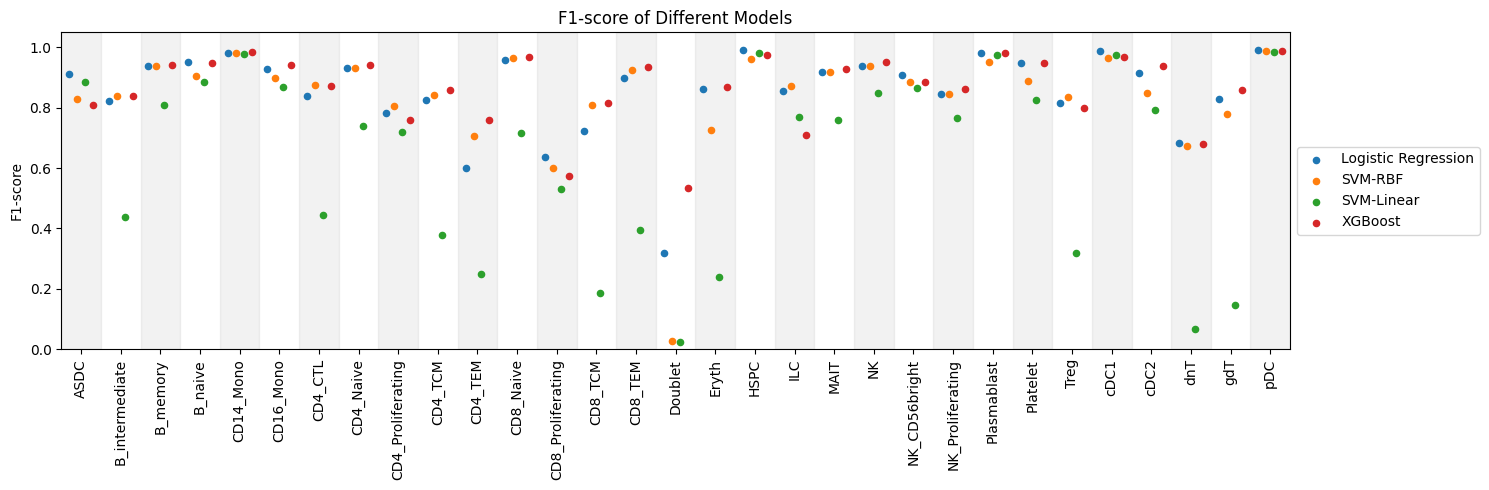

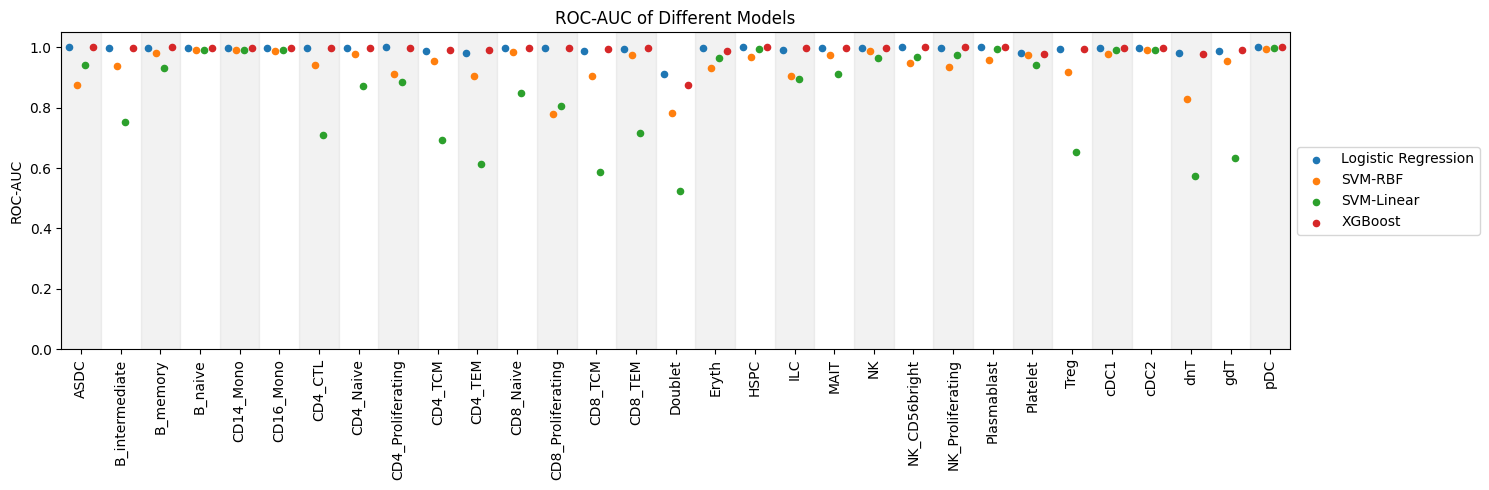

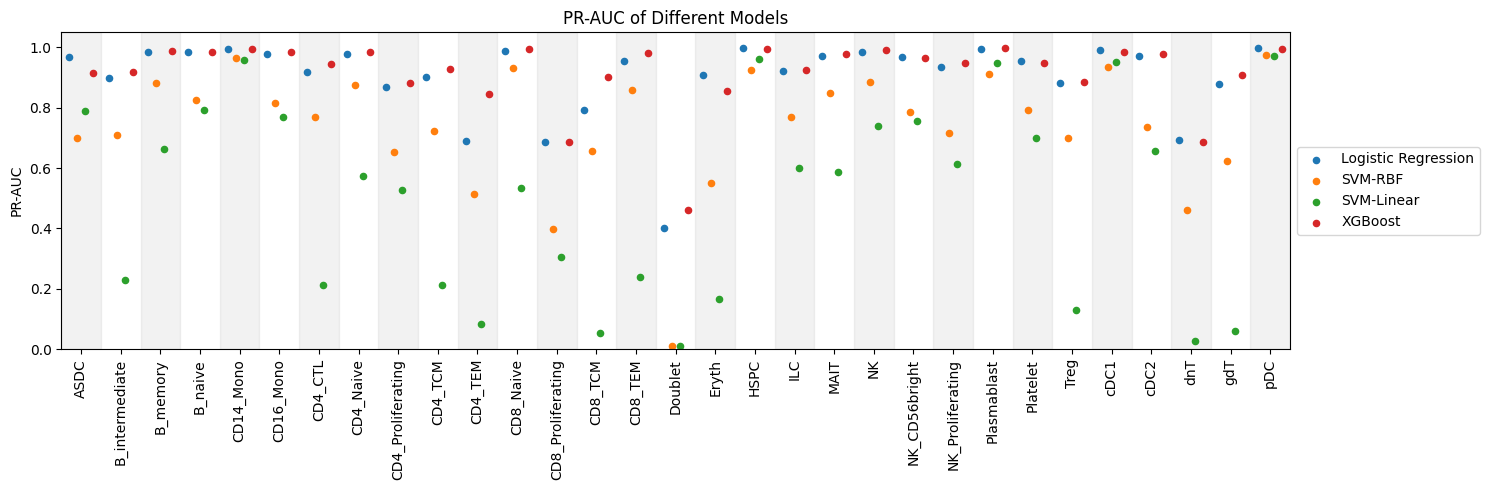

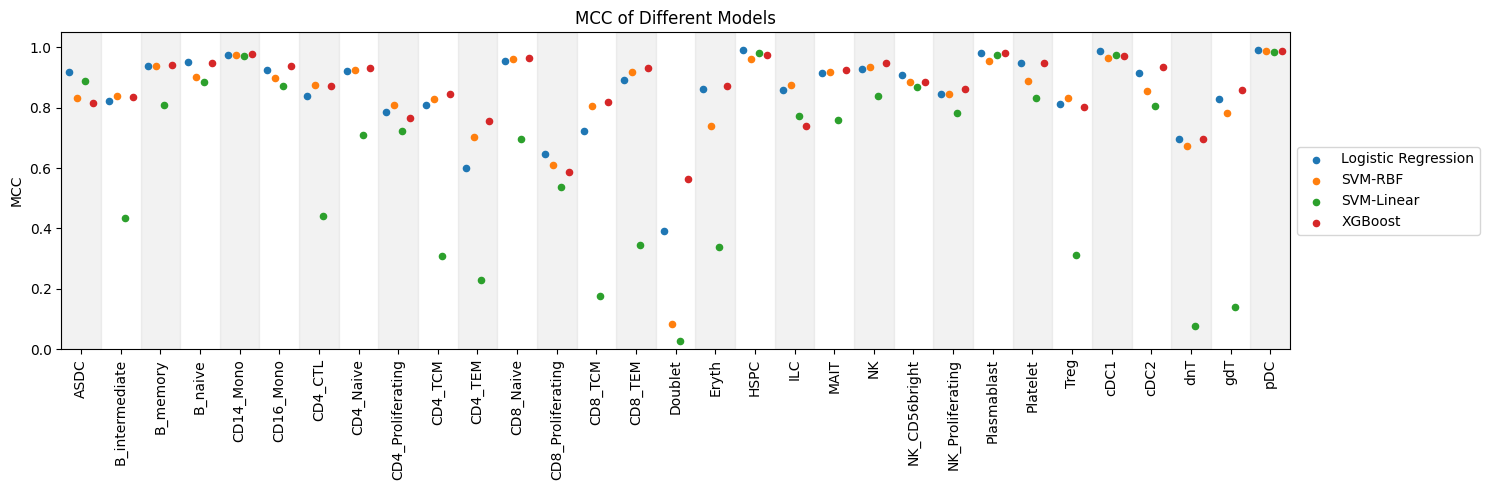

In [10]:
metric_names = ['Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC-AUC', 'PR-AUC', 'MCC']
model_diff_metrics = [lr_metrics_l2, svm_rbf_metrics_l2, svm_linear_metrics_l2, xgb_metrics_l2]
for m in metric_names:
    plot_metric_from_diff_models(model_diff_metrics, metric_to_plot=m, legend=True)

## Barplot

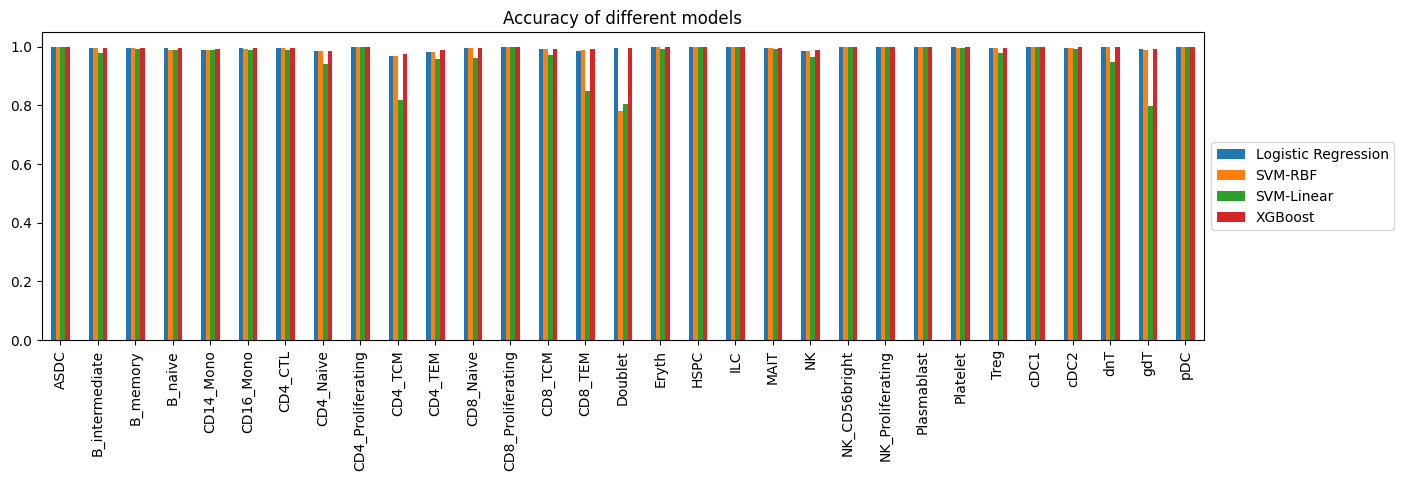

In [11]:
models = ['Logistic Regression', 'SVM-RBF', 'SVM-Linear', 'XGBoost']
model_diff_metrics = [lr_metrics_l2, svm_rbf_metrics_l2, svm_linear_metrics_l2, xgb_metrics_l2]

accuracy_df = pd.DataFrame()
for i, df in enumerate(model_diff_metrics):
    accuracy = df['Accuracy']
    # print(models[i])
    # print(accuracy)
    accuracy_df[models[i]] = accuracy
ax = accuracy_df.plot.bar(rot=90, figsize=(15, 4), title='Accuracy of different models')
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [12]:
def plot_bar_metric_from_diff_models(model_diff_metrics_list, metric_to_plot='Accuracy', legend=True):
    models = ['Logistic Regression', 'SVM-RBF', 'SVM-Linear', 'XGBoost']
    metric_df = pd.DataFrame()
    for i, df in enumerate(model_diff_metrics_list):
        metric = df[metric_to_plot]  # accuracy, precision and so on
        metric_df[models[i]] = metric
    
    plt.figure(figsize=(15, 5))
    x = np.arange(len(metric_df))
    width = 0.15
    for i in range(0, len(metric_df), 2):
        plt.axvspan(i-0.5, i+0.5, color='gray', alpha=0.1)
    for i, model in enumerate(models):
        i -= 1.5
        plt.bar(x + i * width, metric_df[model], label=model, width=width)
    
    # ax = metric_df.plot.bar(rot=90, figsize=(15, 4), title='Accuracy of different models')
    # ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

    # Formatting
    plt.xticks(x, metric_df.index, rotation=90)
    plt.title(f'{metric_to_plot} of Different Models')
    plt.ylabel(f'{metric_to_plot}')
    plt.ylim(0, 1.05)
    plt.xlim(-0.5, len(metric_df) - 0.5)
    if legend:
        plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    plt.tight_layout()
    plt.show()

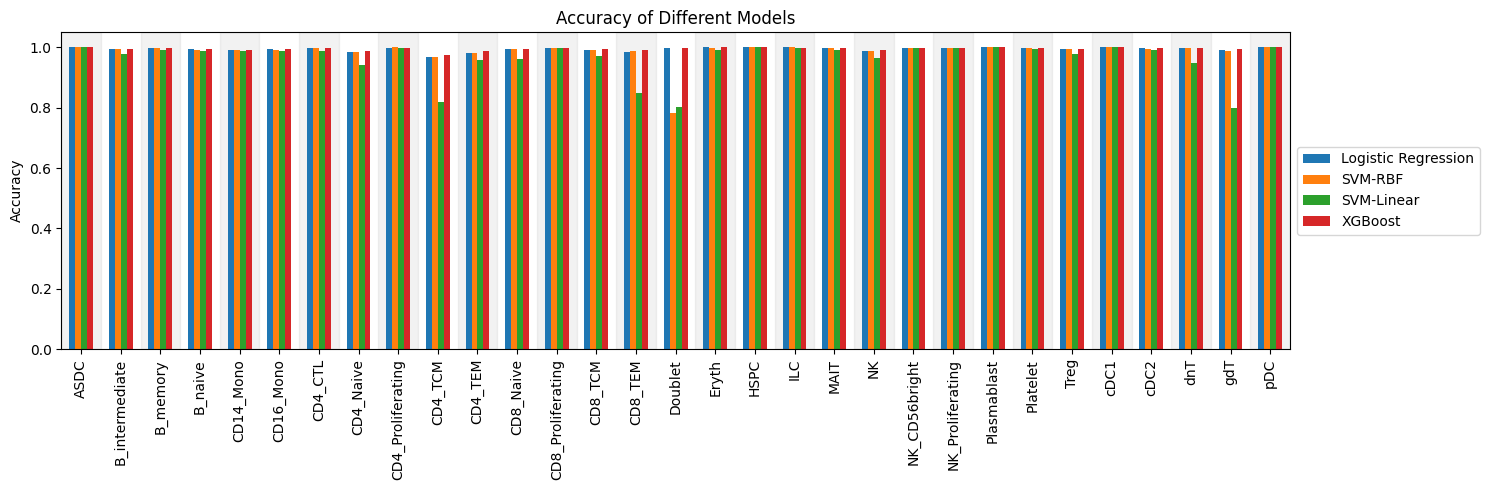

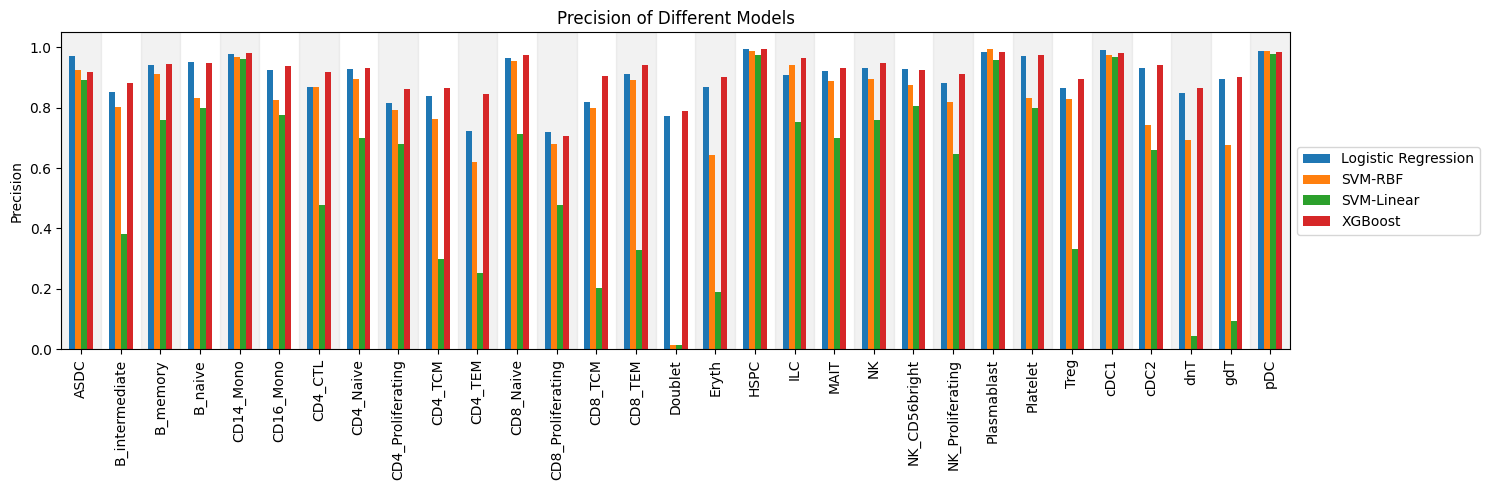

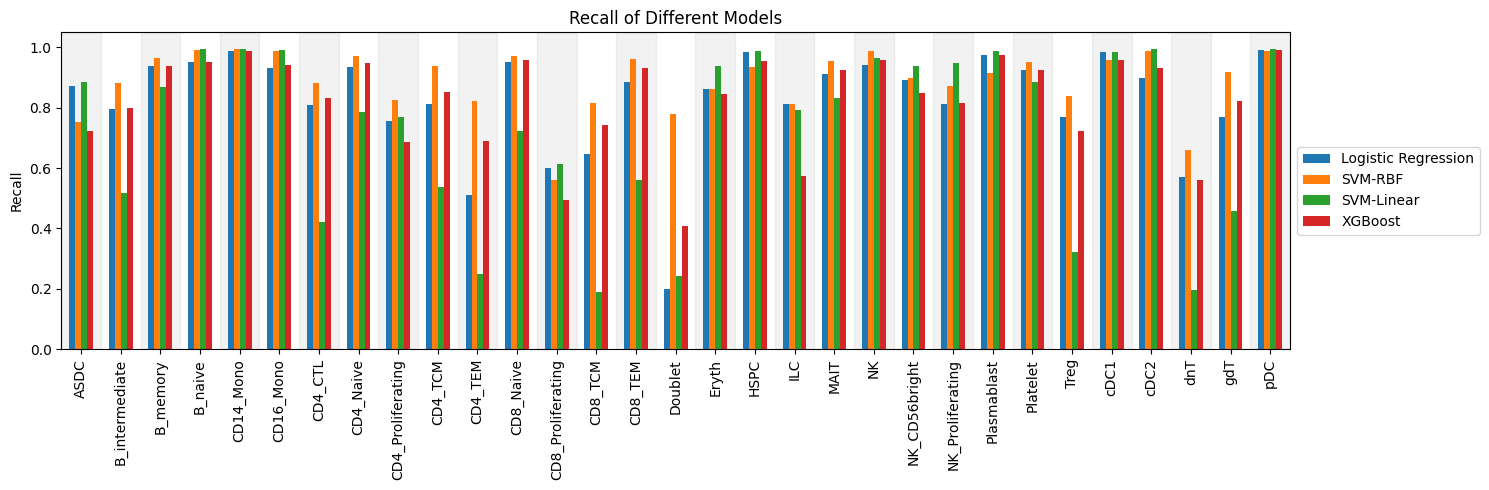

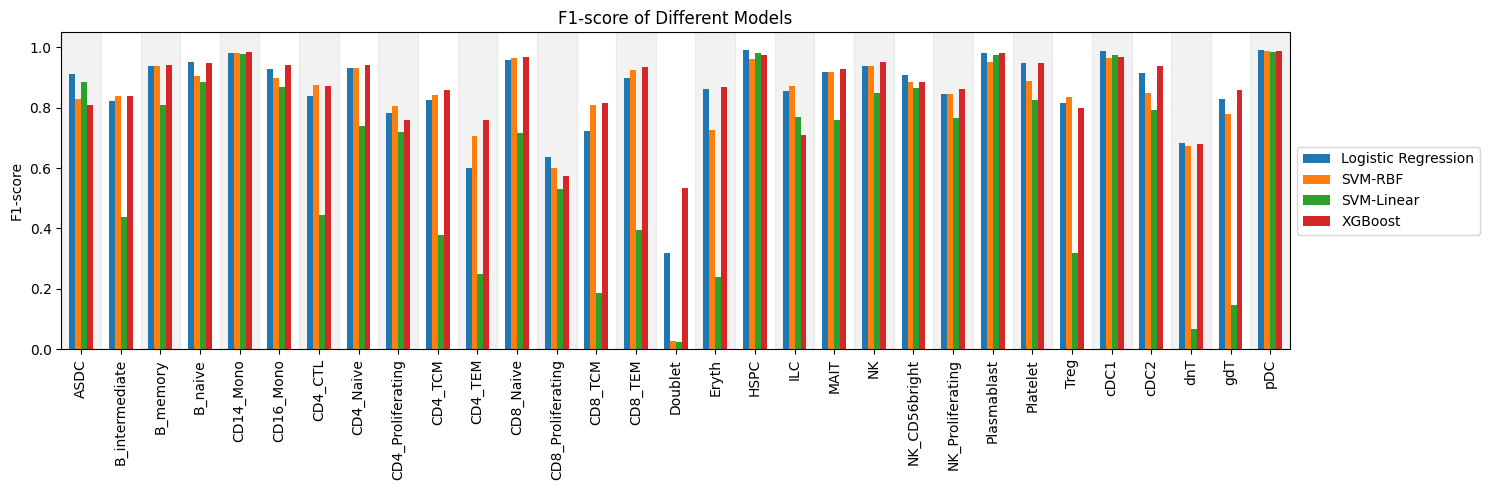

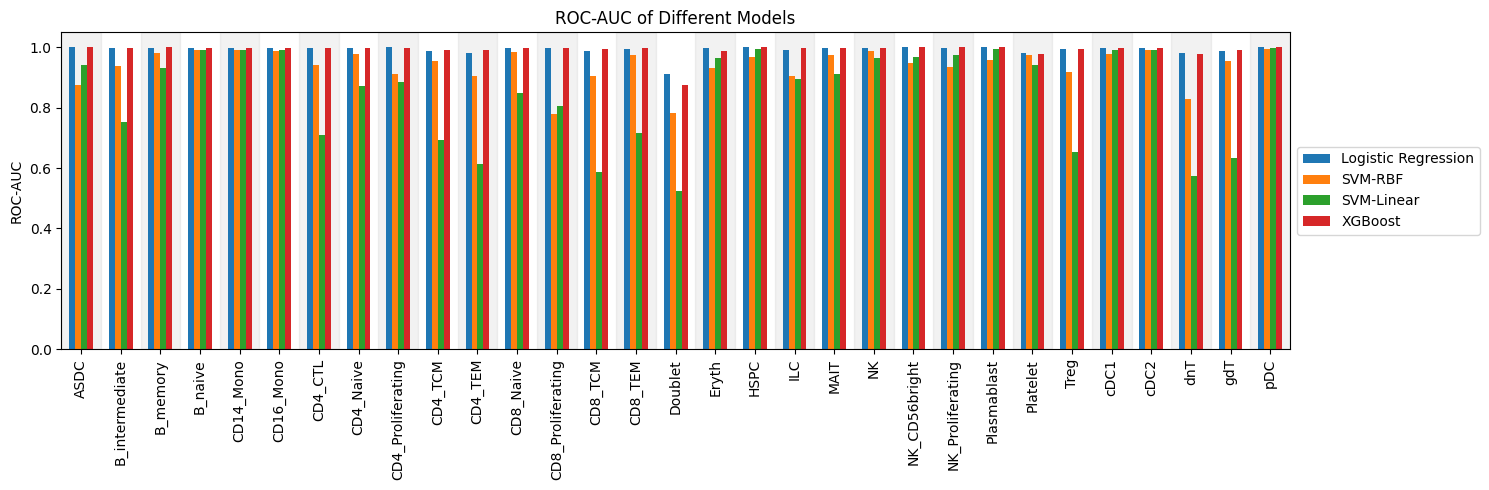

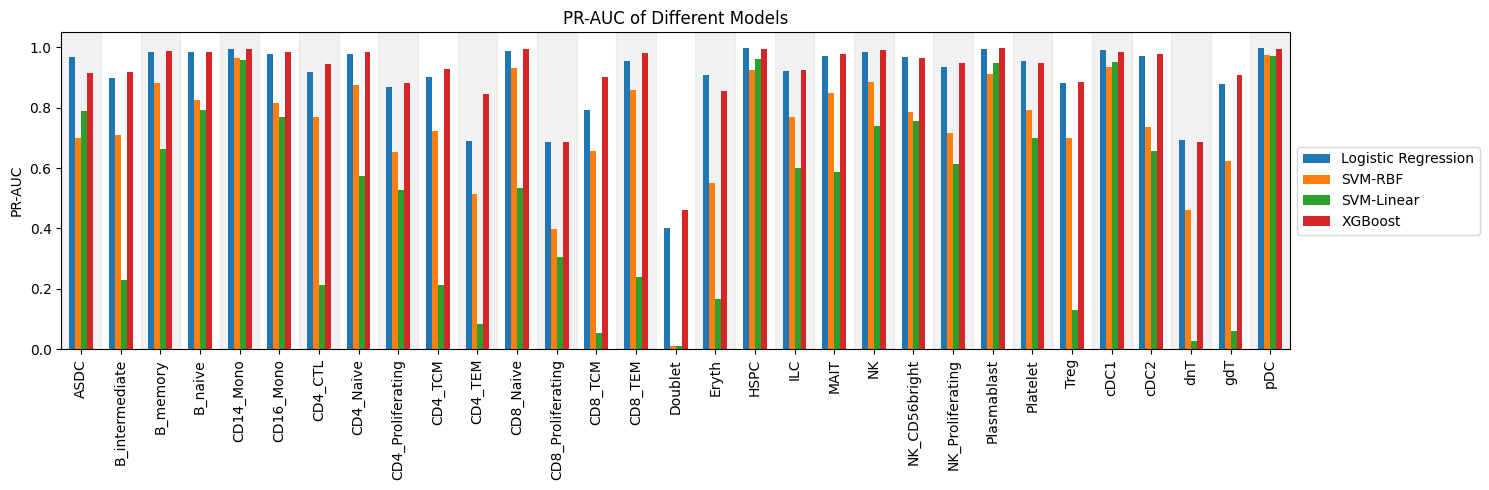

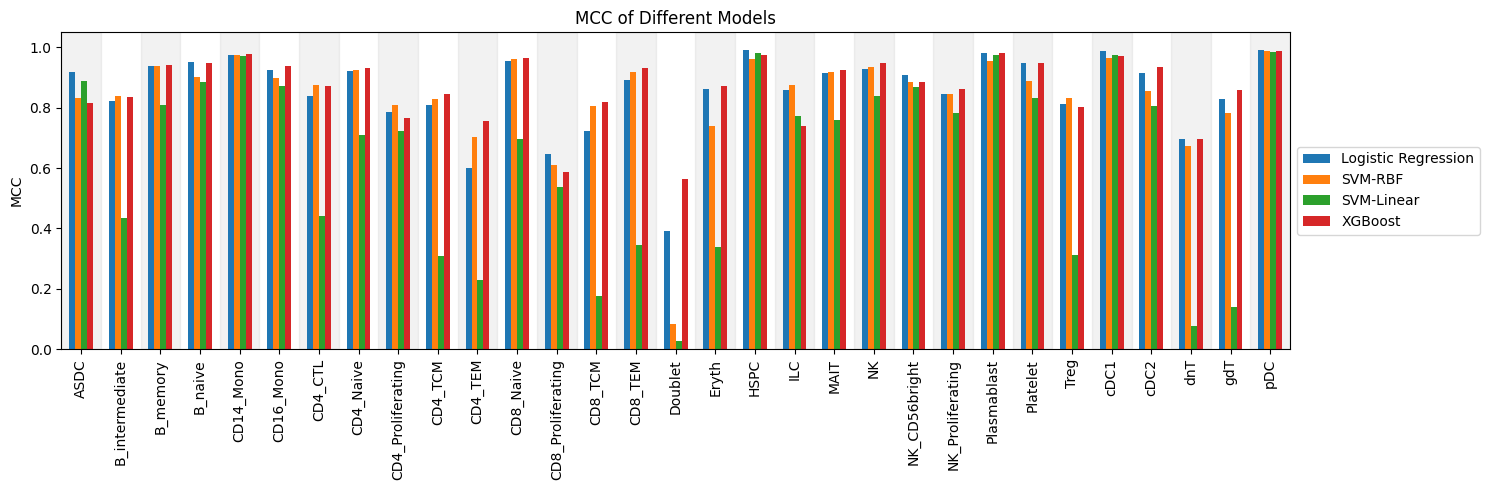

In [13]:
metric_names = ['Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC-AUC', 'PR-AUC', 'MCC']
model_diff_metrics = [lr_metrics_l2, svm_rbf_metrics_l2, svm_linear_metrics_l2, xgb_metrics_l2]
for m in metric_names:
    plot_bar_metric_from_diff_models(model_diff_metrics, metric_to_plot=m, legend=True)